In [1]:
runlist=[1361, 1364, 1365, 1366] # Select LED runs with bias set to 0x600, 0x680, 0x700 and 0x780
DATASET='rec.mu2e.CRV_wideband_cosmics.CRVWB-000-001-000.root'

from mu2etools import *
from mu2etools import wideband
from scipy.signal import find_peaks

In [2]:
processor = wideband.DataProcessor(usexroot=True, fixtimes=False, runlist=runlist, userunlist=True, remove=False, 
                                   treename='run', filter_name=["PEs"])
arr, arSpills = processor.getData(DATASET) # get akward array for "run" tree

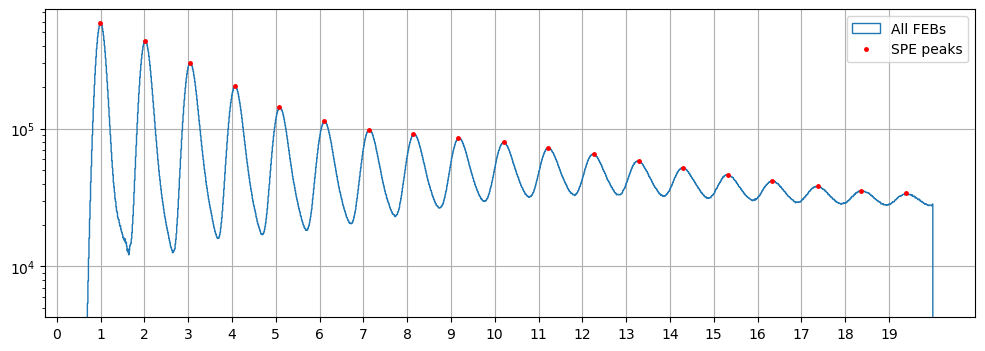

In [3]:
maxx=20
fig = plt.figure(figsize=[12,4])
ax = fig.gca()
ax.set_xticks(np.arange(0, maxx, 1))
hist, bins, _ = plt.hist(ak.flatten(ak.flatten(arr['PEs'])), histtype='step', bins=1600, range=(0.7, maxx), label="All FEBs"); #FEB0
peaks, _ = find_peaks(hist, width=5)
plt.plot(bins[peaks], hist[peaks], "r.", markersize=5, label="SPE peaks")

plt.yscale('log')
plt.grid()
plt.legend();

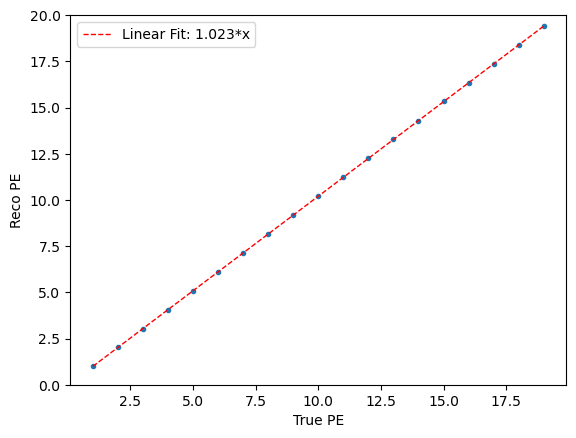

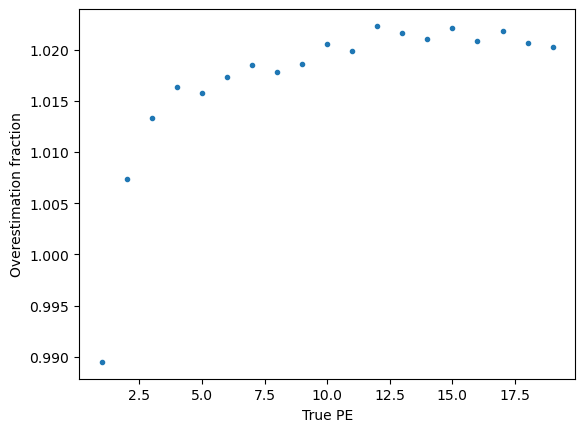

In [4]:
y=bins[peaks]
x=range(1,len(y)+1)
plt.plot(x, y, '.');
m, b = np.polyfit(x, y, deg=1)

line = m * x + b
b=np.float64(0)
plt.plot(x, line, '--r', linewidth=1, label='Linear Fit: %0.3f*x'%(m))
plt.xlabel("True PE")
plt.ylabel("Reco PE")
plt.legend();
plt.ylim(0,maxx)

plt.figure()
plt.plot(x, y/x, '.');
plt.xlabel("True PE")
plt.ylabel("Overestimation fraction");
